<a href="https://colab.research.google.com/github/JavierArdans/Data-Science---ACV/blob/main/Storytelling_0_1_ACV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagina que estás sentado en tu oficina, trabajando en tu computadora. De repente, comienzas a sentir un dolor intenso en la cabeza y tu brazo izquierdo se entumece. Tratas de moverlo, pero no responde. Tu habla se vuelve incoherente y te das cuenta de que algo está muy mal.

Lo que estás experimentando es un ACV. Los ACV son causados ​​por la interrupción del suministro de sangre al cerebro, y pueden ser fatales o dejar discapacidades graves. Son la segunda causa principal de muerte a nivel mundial y pueden afectar a cualquier persona, en cualquier momento.

**Pero hay buenas noticias:** la mayoría de los ACV se pueden prevenir con algunos cambios en tu estilo de vida. Aquí hay algunas cosas que puedes hacer para reducir tu riesgo de tener un ACV:

**Controla tu presión arterial:** La hipertensión es uno de los principales factores de riesgo para el ACV. Asegúrate de hacer chequeos regulares y tomar medicamentos según lo recetado por tu médico.

**Deja de fumar:** Fumar daña tus arterias y aumenta tu riesgo de tener un ACV. Si eres fumador, considera dejarlo lo antes posible.

**Mantén una dieta saludable:** Consumir una dieta rica en frutas, verduras, granos enteros, proteínas magras y grasas saludables puede ayudar a reducir tu riesgo de ACV. Limita la ingesta de alimentos procesados, grasas saturadas y azúcares refinados.

**Haz ejercicio regularmente:** La actividad física regular puede ayudar a reducir tu riesgo de ACV. Trata de hacer al menos 150 minutos de ejercicio moderado a la semana.

**Controla tu peso:** El sobrepeso y la obesidad aumentan tu riesgo de ACV. Si tienes sobrepeso, trata de perder peso gradualmente a través de una combinación de ejercicio y cambios en la dieta.

**Recuerda, la prevención es la clave para evitar un ACV. Haz algunos cambios en tu estilo de vida hoy para proteger tu salud y bienestar a largo plazo.**

LIBRERIAS A UTILIZAR

In [56]:
# LIBRERIAS A UTILIZAR

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [57]:
# CARGAR EL DATASET

acv = pd.read_csv ('/content/ACV-Storytelling.csv')

In [58]:
# MOSTRAR EJEMPLO DATASET CARGADO 3 FILAS
acv.head(3).T

,0,1,2
gender,Male,Male,Female
age,67.0,80.0,49.0
hypertension,0,0,0
heart_disease,1,1,0
ever_married,Yes,Yes,Yes
work_type,Private,Private,Private
Residence_type,Urban,Rural,Urban
avg_glucose_level,228.69,105.92,171.23
bmi,36.6,32.5,34.4
smoking_status,formerly smoked,never smoked,smokes


MOSTRAR EJEMPLO DATASET CARGADO 3 FILAS

In [59]:
#CARGANDO INFORMACION GENERAL DE DATASET, TOTAL DE ENTRADAS, TOTAL DE NO NULOS, Y TIPO DE DATOS.

acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 388.4+ KB


CARGANDO INFORMACION GENERAL DE DATASET, TOTAL DE ENTRADAS, TOTAL DE NO NULOS, Y TIPO DE DATOS.

In [60]:
# DESCRIPCION DEL DATASET, MOSTRANDO LA SUMA, LA MINIMA, LA MAXIMA Y MEDIA ETC
acv.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,4909.00,4909.00,4909.00,4909.00,4909.00
mean,42.87,0.09,0.05,105.31,28.89
std,22.56,0.29,0.22,44.42,7.85
min,0.08,0.00,0.00,55.12,10.30
25%,25.00,0.00,0.00,77.07,23.50
50%,44.00,0.00,0.00,91.68,28.10
75%,60.00,0.00,0.00,113.57,33.10
max,82.00,1.00,1.00,271.74,97.60


DESCRIPCION DEL DATASET, MOSTRANDO LA SUMA, LA MINIMA, LA MAXIMA Y MEDIA ETC

MANEJO DE LOS TIPOS DE CATEGORÍAS DE LOS DATOS:

Tanto las características categóricas como las numéricas están presentes.

- Características categóricas: gender, ever_married, work_type, Residence_type, smoking_status
- Características numéricas binarias: hypertension,heart_disease, stroke
- Características numéricas continuas: age, avg_glucose_level, bmi

La mayoría de los datos son categóricos que necesitan una atención especial para visualizarlos.
La extracción de características se puede hacer agrupando las características continuas (edad, nivel de azúcar e índice de masa corporal) y mantengamos todo como está.

Text(0.5, 1.0, 'Matris de valores nulos o vacíos')

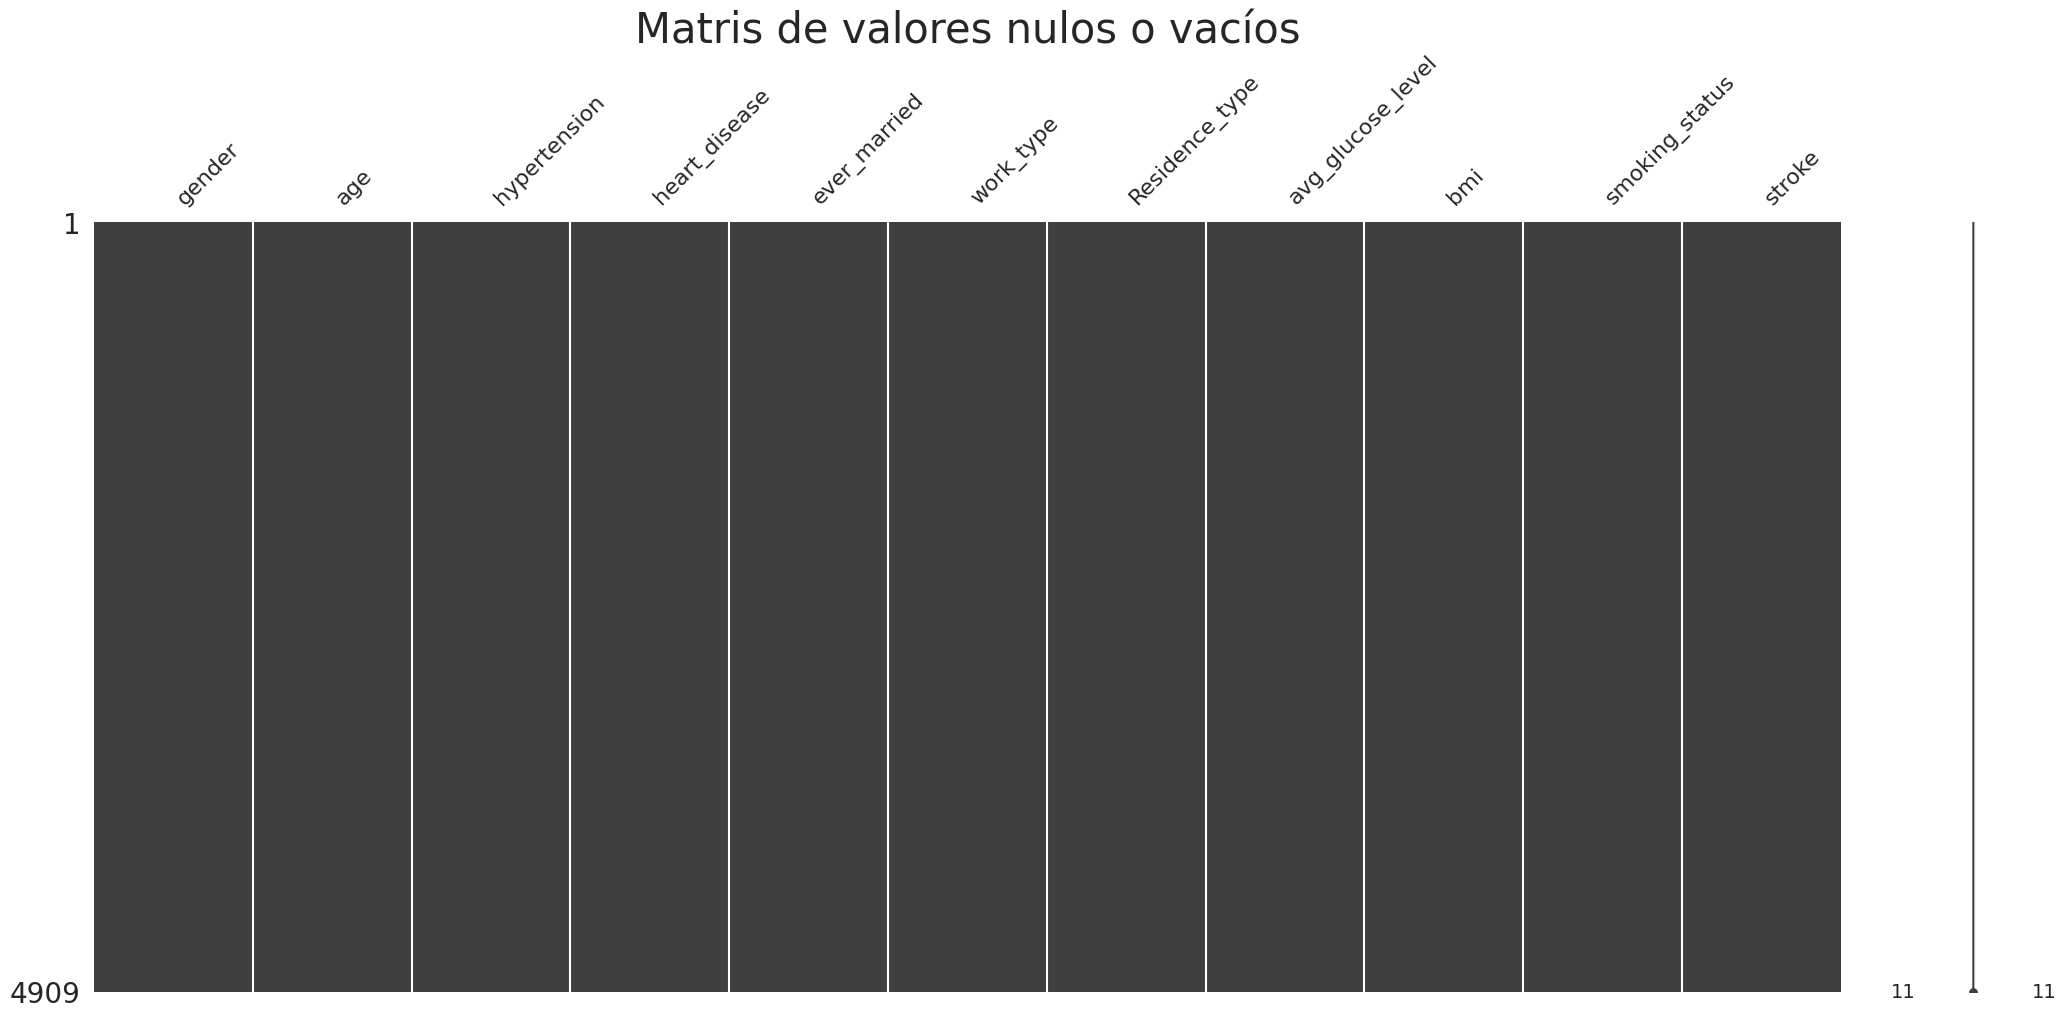

In [61]:
msno.matrix(acv)
plt.title("Matris de valores nulos o vacíos",fontsize=30)

In [62]:
# TRABAJANDO CON LOS DATOS FALTANTES
acv['bmi'] = acv['bmi'].fillna(round (acv['bmi'].median(), 2))
acv.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [63]:
# AGRUPANDO VARIABLES NUMÉRICAS

acv['bmi_cat'] = pd.cut(acv['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
acv['age_cat'] = pd.cut(acv['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
acv['glucose_cat'] = pd.cut(acv['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

In [64]:
# CONTANDO CASOS POSITIVOS Y NEGATIVOS

x = pd.DataFrame( acv.groupby(['stroke'])['stroke'].count())
print (x)

        stroke
stroke        
False     4700
True       209


<BarContainer object of 1 artists>

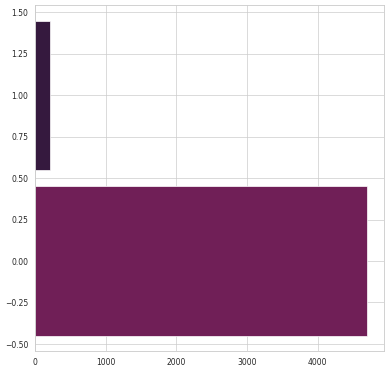

In [72]:
# SUBPLOT MOSTRANDO LA DIFERENCIA ENTRE LOS ESTADOS DE LOS ENCUESTADOS
fig, ax = plt.subplots(figsize = (9,9), dpi = 50)
ax.barh([1], x.stroke[1], height = 0.9,)
ax.barh([0], x.stroke[0], height = 0.9,)


La distribuicion de los encuestados, es mayoritariamente en casos negativos de acv.

Text(0.5, 1.0, 'Boxplot')

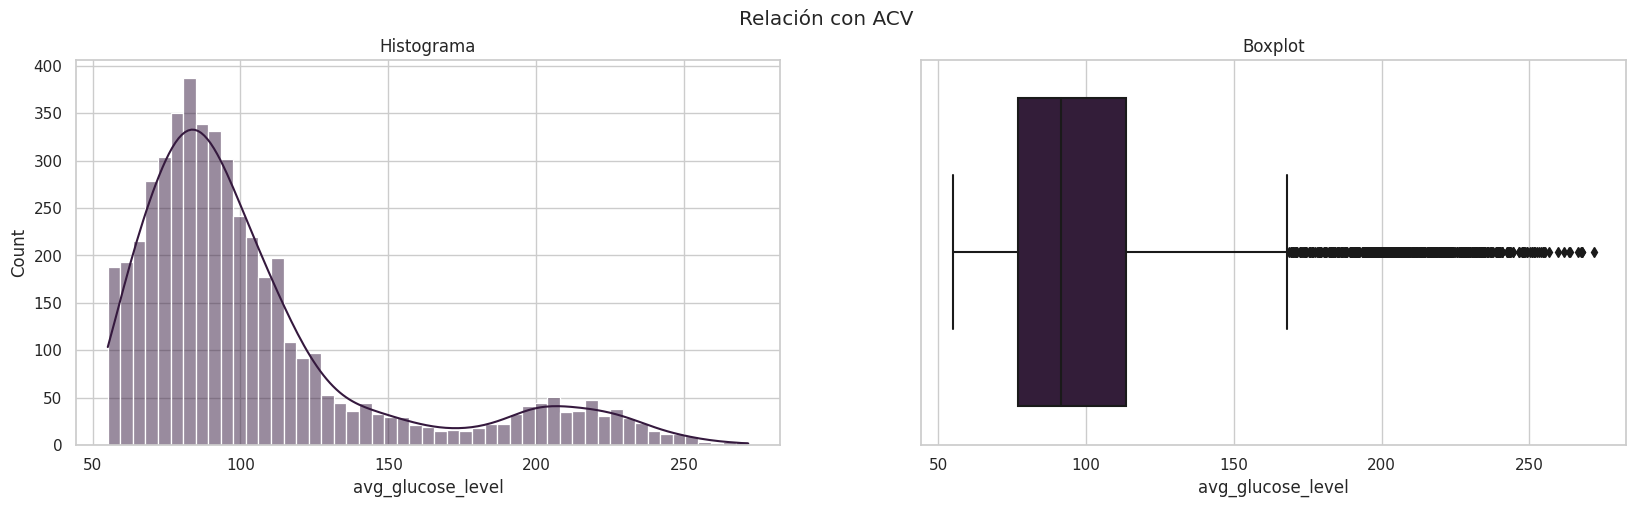

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Relación con ACV')

# Histograma
sns.histplot(ax=axes[0], x = acv['avg_glucose_level'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = acv['avg_glucose_level'])
axes[1].set_title("Boxplot")

Se logra distinguir que de los entrevistados los niveles de Gluvosa son de la mayoría de un bajo nivel.